### Tarea 1: 

Captura una o varias imágenes con monedas no solapadas. Tras visualizar la imagen, identifica de forma interactiva (por ejemplo haciendo clic en la imagen) una moneda de un valor determinado en la imagen (por ejemplo de 1€). Tras ello, la tarea se resuelve mostrando por pantalla el número de monedas y la cantidad de dinero presentes en la imagen. No hay restricciones sobre utilizar medidas geométricas o de color. ¿Qué problemas han observado?

Nota: Para establecer la correspondencia entre píxeles y milímetros, comentar que la moneda de un euro tiene un diámetro de 23.25 mm. la de 50 céntimos de 24.35, la de 20 céntimos de 22.25, etc. 

Extras: Considerar que la imagen pueda contener objetos que no son monedas y/o haya solape entre las monedas. Demo en vivo.

In [1]:
#Librerías necesarias

import cv2  
import numpy as np
import matplotlib.pyplot as plt

#### Desglose:

1º: Visualizar la imagen e identificar una moneda de la imagen.
2º: Mostrar por pantalla el número de monedas y cantidad de dinero presente en la imagen.

##### Alternativa 1: findContours()
Búsqueda de contornos general para cualquier figura geométrica (mejor para la tarea 2)

(795, 1200, 3)


Text(0.5, 1.0, 'findContours')

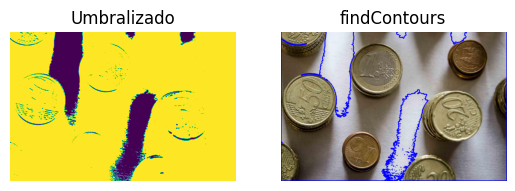

In [163]:
#Carga de la imagen de ejemplo con monedas
img = cv2.imread('Material_P3/varias-monedas.jpg') 
print(img.shape)

#Conversión a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


#Conversión de la imagen a tonos de gris
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Umbralizado binario invertido
th,img_th = cv2.threshold(img_gris,200,255,cv2.THRESH_BINARY_INV)

#Muestra de la imagen
plt.subplot(121)
plt.axis("off")
plt.imshow(img_th) 
plt.title('Umbralizado')

#Obtención de los contornos externos
contornos, hierarchy = cv2.findContours(
	img_th, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

#Dibuja sobre la imagen de entrada los contornos en azul (se ve mejor)
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,0,255), 3)

plt.subplot(122)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('findContours')



##### Alternativa 2: Transformada de Hough

Función dedicada para hallar circunferencias, más apta en caso de lograr un ratio consistente en todas las imagenes

(800, 1207)


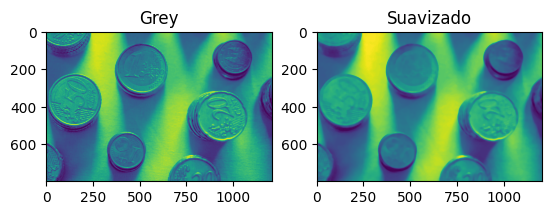

In [169]:
#-------------------------- Alternativa por Transformada de Hough -----------------------


#Reescalado si fuera necesario
height, width = img.shape[:2]

if(height < 800):
      scale = 800/height
      n_height = int(height*scale)
      n_width = int(width*scale)

      img_resize = cv2.resize(img, (n_width, n_height), interpolation=cv2.INTER_AREA)
else:
       img_resize = img


#Conversión a gris
gris = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
print(gris.shape)

plt.subplot(121)
plt.imshow(gris) 
plt.title('Grey')

#Suavizado
pimg = cv2.medianBlur(gris, 15)

plt.subplot(122)
plt.imshow(pimg) 
plt.title('Suavizado')


#Hallar círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT_ALT,  # tipo de detección
        1.5,
        50,  # distancia mínima entre círculos
        param1=500, # valor del gradiente
        param2=0.8, # umbral acumulador
        minRadius= 20
    )






### Clasificación de monedas
Se procede a clasificar las monedas por diametro y ratio entre las detectadas a partir de los datos obtenidos por transformación de Hough.

Clasificación de monedas

Se han detectado 5 circunferencias
Circunferencias ordenadas y proporciones de radio:
Círculo (x: 150.0, y: 369.0, radio:  138.16) - Proporción: 1.000
Círculo (x: 513.0, y: 204.0, radio:  135.26) - Proporción: 0.979
Círculo (x: 939.0, y: 454.5, radio:  125.72) - Proporción: 0.910
Círculo (x: 433.5, y: 636.0, radio:  93.40) - Proporción: 0.676
Círculo (x: 1011.0, y: 138.0, radio:  89.89) - Proporción: 0.651


Text(0.5, 1.0, 'Hough')

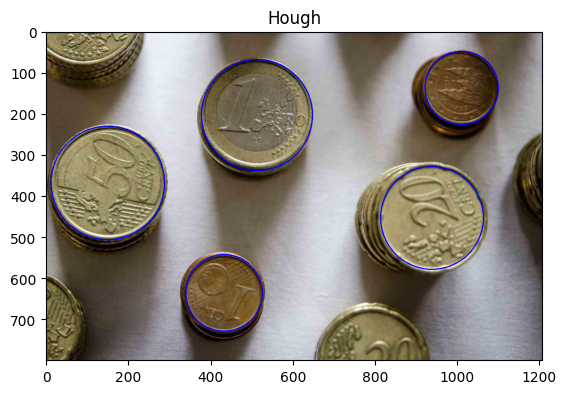

In [175]:
#Ordenar lista por radio de las circunferencias detectadas
s_circ = sorted(circ[0], key = lambda circle: circle[2], reverse=True)

#Obtener proporcion
max_r = s_circ[0][2];
rat = [(x,y,r, r/max_r) for x,y,r in s_circ]

#Método para comprobar si un valor está cerca de otro dada una tolerancia
def close_val(val1, val2, tol):
    diff = abs(val1-val2)
    return (diff <= tol)

#monedas = [
#    ("two_euro", 25.75)
#    ("one_euro",23.25), 
#    ("fifty_cts", 24.25), 
#    ("twenty_cts", 22.25), 
#    ("ten_cts", 19.75), 
#    ("five_cts", 21.25), 
#    ("two_cts", 18.75), 
#    ("one_cts", 16.25)
#    ]
#
#base_rat = [(k, r/25.75) for k, r in monedas]
#

print(f"Se han detectado {len(circ[0])} circunferencias")
print("Circunferencias ordenadas y proporciones de radio:")
for circle in rat:
    print(f"Círculo (x: {circle[0]}, y: {circle[1]}, radio: {circle[2]: .2f}) - Proporción: {circle[3]:.3f}")

#Dibujo sobre entrada e imagen vacía
img_rgb = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)

for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 0, 255), 2)



#Muestra resultado
plt.plot()
plt.imshow(img_rgb) 
plt.title('Hough')
